# Merged Host and Job perspective

Here, we're trying to estimate how many of which job type could have been run on the system.

In [1]:
from pathlib import Path

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
pd.set_option('display.max_rows', 4)

## Parameters

In [4]:
#parameters
tmp_data_path = "../tmp_data/"

theoretical_job_classes = {
    "small": {
        "cpu": 2,  # cpu count
        "mem": 8,  # GB
        "duration": "1800S"
    },
    "medium": {
        "cpu": 16,  # cpu count
        "mem": 64,  # GB
        "duration": "3600S"
    },
    "big": {
        "cpu": 24,  # cpu count
        "mem": 120,  # GB
        "duration": "7200S"
    },
}

## Read log files

In [5]:
host_logs = pd.read_parquet("../tmp_data/host_logs.prq")

In [6]:
host_logs

,Date,Free_CPUs,Free_Mem1,Used_CPUs,Cpu,Used_Mem1,ExecutionHost,QueueName,Free_Swap1,Used_Swap1,Load
0,2020-01-12 18:17:31,0,349.402344,32,32.0,33.308594,neshcl218,clbigmem,NaN,NaN,NaN
1,2020-01-12 18:17:31,0,302.101562,32,32.0,80.609375,neshcl219,clbigmem,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2206619,2020-04-07 09:53:57,63,736.996094,1,0.0,29.714844,nesh-fe2-adm,nan,0.085938,3.910156,0.4
2206620,2020-04-07 09:53:57,63,752.734375,1,1.0,13.976562,nesh-fe3-adm,nan,1.750000,2.246094,1.0


## Free resources across whole cluster

,Free_CPUs,Free_Mem1
Date,,
2020-01-12 18:17:31,1503,34443.578125
2020-01-12 18:27:31,1519,34264.750000
...,...,...
2020-04-07 09:43:56,5639,37583.062500
2020-04-07 09:53:57,5639,37603.375000


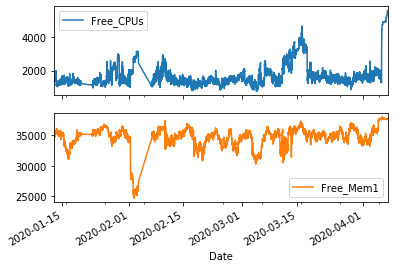

In [7]:
free_cpu_mem_total = host_logs.groupby("Date")[["Free_CPUs", "Free_Mem1"]].sum()

display(free_cpu_mem_total)
free_cpu_mem_total.plot(subplots=True);

## Free resources in number of blocks

We account for the lenght of the job blocks by resampling the free resources over the duration with a `min` filter.

In [10]:
resources_by_time_and_host = {}

for cls_name, job_cls  in job_classes.items():

    resources_by_time_and_host[cls_name] = host_logs[
        ["Date", "ExecutionHost", "Free_Mem1", "Free_CPUs"]
    ].set_index("Date").groupby(
        [pd.Grouper(freq=job_cls["duration"]), "ExecutionHost"]
    ).min()
    
    resources_by_time_and_host[cls_name][f"Free_Mem1_blocks_{cls_name}"] = resources_by_time_and_host[cls_name]["Free_Mem1"] // job_cls["mem"]
    resources_by_time_and_host[cls_name][f"Free_CPUs_blocks_{cls_name}"] = resources_by_time_and_host[cls_name]["Free_CPUs"] // job_cls["cpu"]

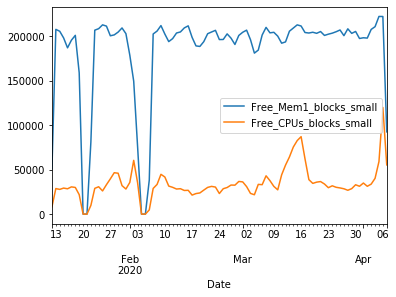

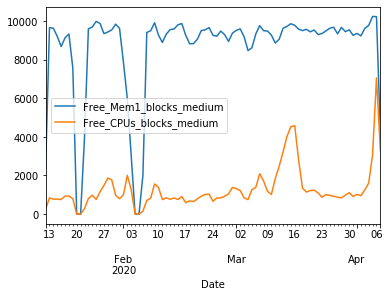

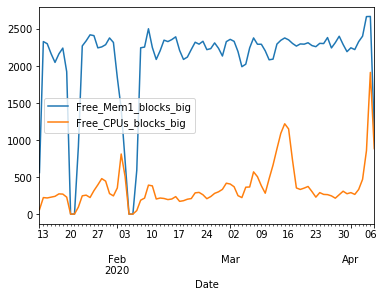

In [16]:
for cls_name in job_classes.keys():
    resources_by_time_and_host[cls_name].filter(like="_blocks_").reset_index().groupby("Date").sum().resample("24H").sum().plot();

# Python environment

In [20]:
!conda list --explicit

# This file may be used to create an environment using:
# $ conda create --name <env> --file <this file>
# platform: osx-64
@EXPLICIT
https://conda.anaconda.org/conda-forge/osx-64/tbb-2018.0.5-h2d50403_0.tar.bz2
https://repo.anaconda.com/pkgs/main/osx-64/blas-1.0-mkl.conda
https://conda.anaconda.org/conda-forge/osx-64/ca-certificates-2019.11.28-hecc5488_0.tar.bz2
https://repo.anaconda.com/pkgs/main/osx-64/intel-openmp-2019.4-233.conda
https://repo.anaconda.com/pkgs/main/osx-64/jpeg-9b-he5867d9_2.conda
https://repo.anaconda.com/pkgs/main/osx-64/libcxxabi-4.0.1-hcfea43d_1.conda
https://repo.anaconda.com/pkgs/main/osx-64/libgfortran-3.0.1-h93005f0_2.conda
https://repo.anaconda.com/pkgs/main/osx-64/libsodium-1.0.16-h3efe00b_0.conda
https://repo.anaconda.com/pkgs/main/osx-64/pandoc-2.2.3.2-0.conda
https://repo.anaconda.com/pkgs/main/osx-64/xz-5.2.4-h1de35cc_4.conda
https://repo.anaconda.com/pkgs/main/osx-64/yaml-0.1.7-hc338f04_2.conda
https://repo.anaconda.com/pkgs/main/osx-64/zlib-1.2.11-h